<a href="https://colab.research.google.com/github/Itzz-Hashan/Client-Prediction-System/blob/Data-cleaning-process/Preproccesing/Preproccesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# File path to the original dataset
file_path = "bank-additional-full.csv"

# Load the dataset with the correct delimiter
data = pd.read_csv(file_path, delimiter=";")

# Save the dataset as a new CSV file
new_file_path = "bank-add-new-dataset.csv"
data.to_csv(new_file_path, index=False)

print(f"New dataset saved as: {new_file_path}")


New dataset saved as: bank-add-new-dataset.csv


Duplicates checkout

In [ ]:
import pandas as pd

# Load the dataset
file_path = "bank-add-new-dataset.csv"
data = pd.read_csv(file_path)

# Check for duplicates
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Display the duplicate rows
if duplicate_count > 0:
    duplicates = data[data.duplicated()]
    print("Duplicate rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")

# Remove duplicates if any
data_cleaned = data.drop_duplicates()

# Save the cleaned dataset
cleaned_file_path = "bank-add-new-dataset-cleaned.csv"
data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved as: {cleaned_file_path}")


Number of duplicate rows: 12
Duplicate rows:
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   n

Show outliers


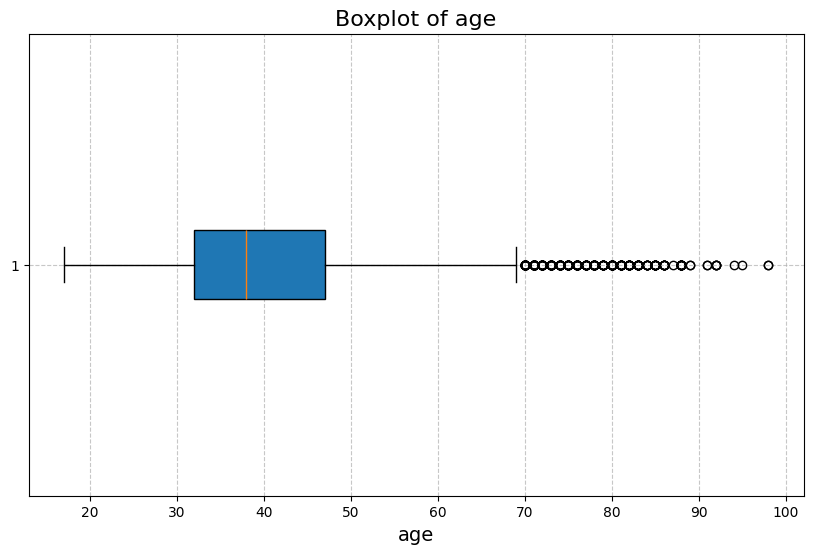

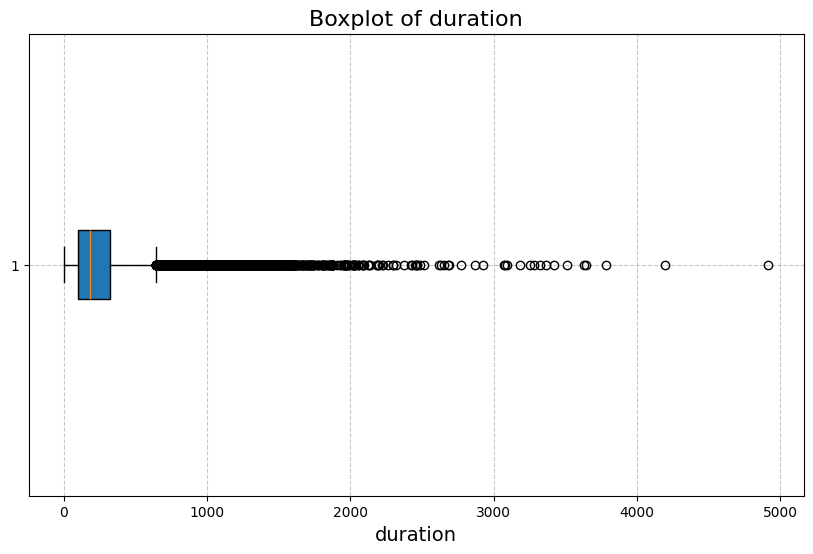

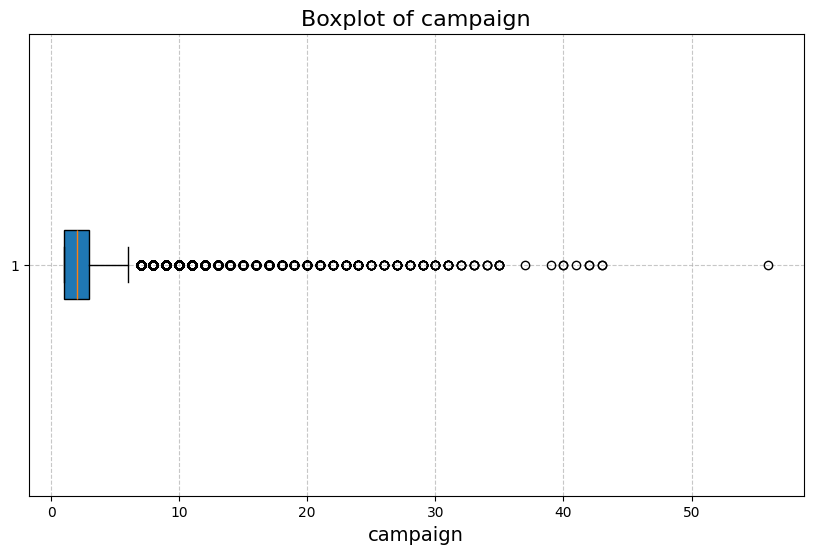

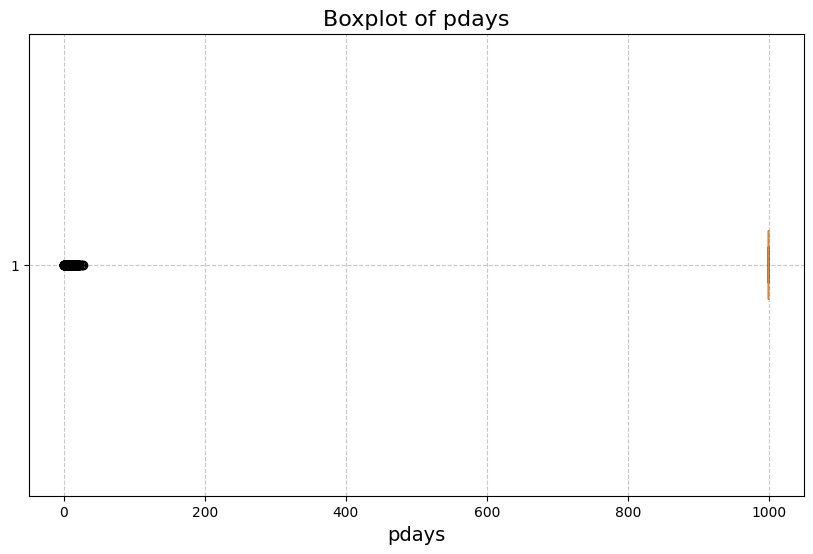

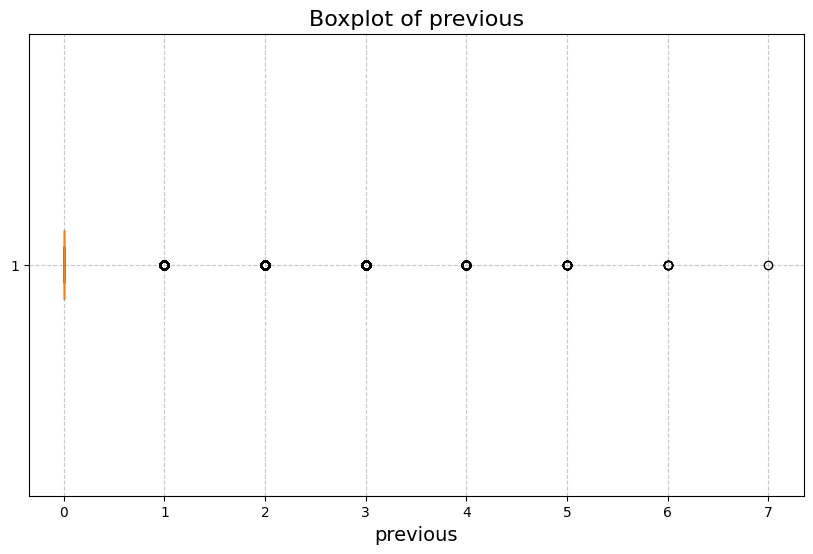

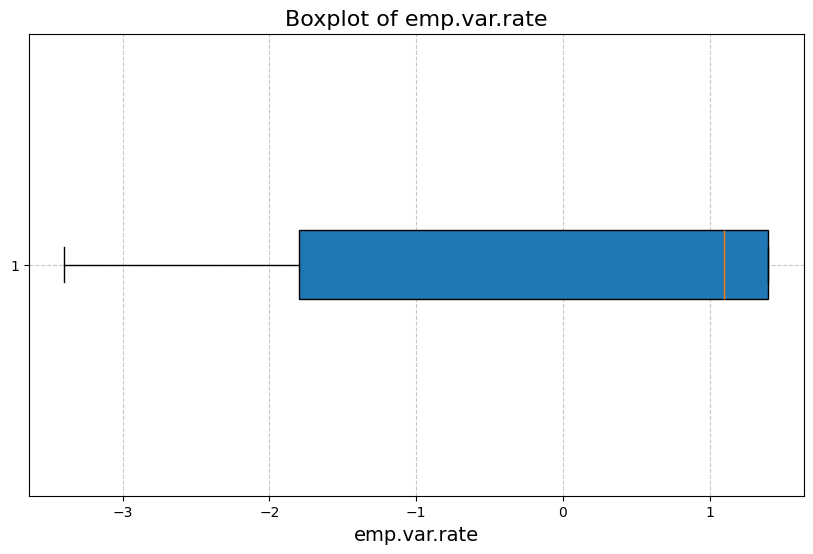

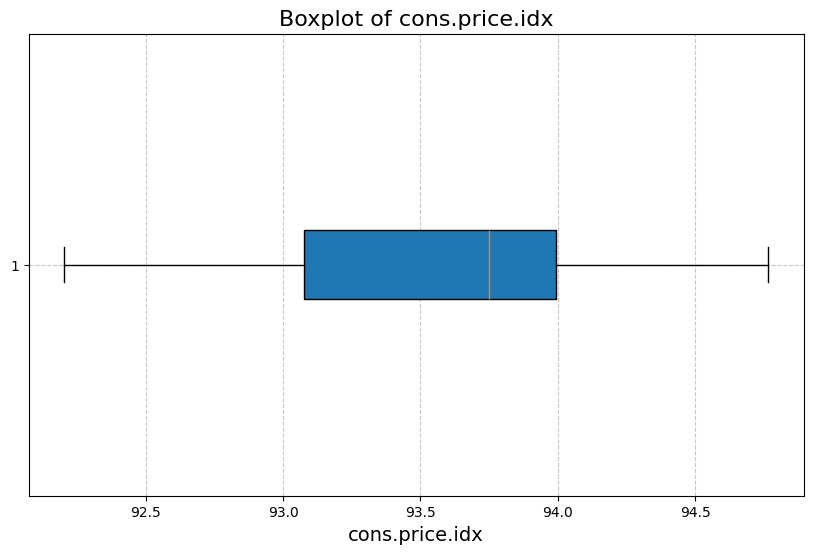

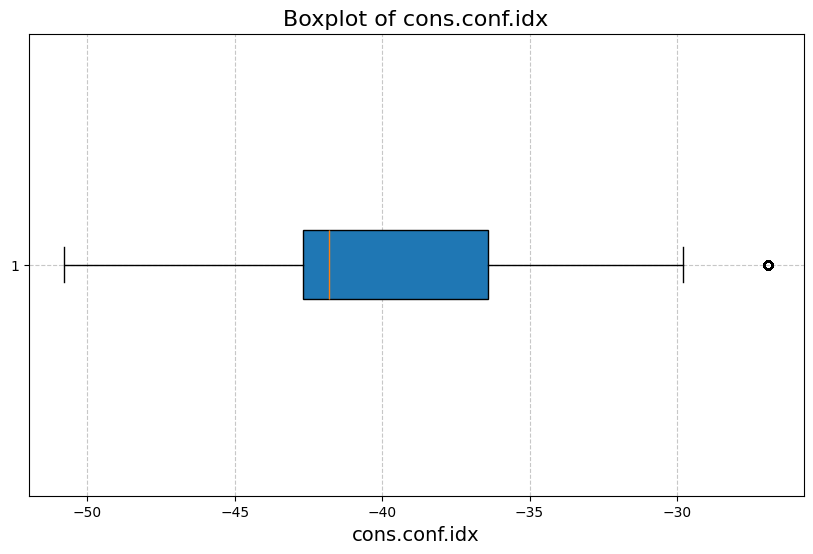

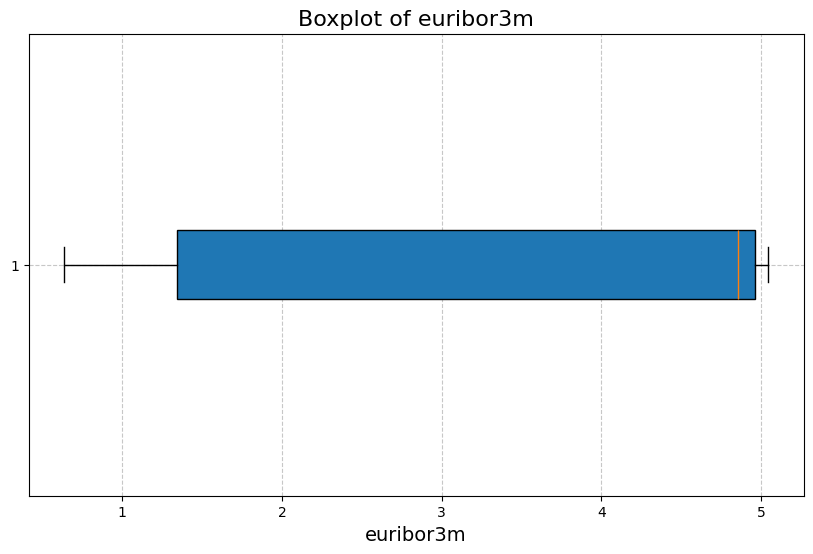

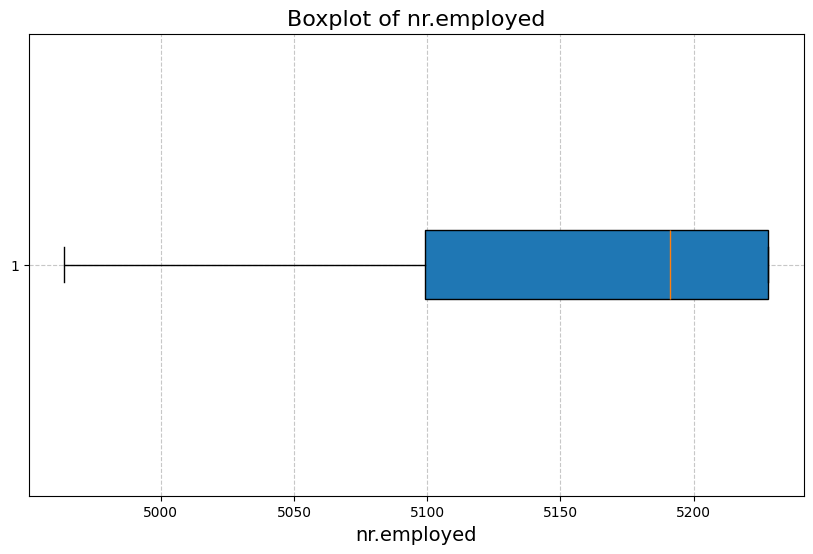

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'bank-add-new-dataset-cleaned.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Plot boxplots for numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(data[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Boxplot of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


Outliers  Filtered *dataset*

In [9]:
import pandas as pd


# Load the dataset
file_path = 'bank-add-new-dataset-cleaned.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out the outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier removal on numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns
cleaned_data = remove_outliers_iqr(data, numerical_columns)

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'bank-add-new-dataset-cleaned-nooutliers.csv'  # Adjust the file name/path as needed
cleaned_data.to_csv(cleaned_file_path, index=False)

print(f"Dataset without outliers saved to {cleaned_file_path}")


Dataset without outliers saved to bank-add-new-dataset-cleaned-nooutliers.csv



Encoded dataset


In [16]:
import pandas as pd

# Load the dataset
file_path = 'bank-add-new-dataset-cleaned-nooutliers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Save the encoded dataset to a new CSV file
encoded_file_path = 'Encoded_new_dataset.csv'
encoded_data.to_csv(encoded_file_path, index=False)

encoded_file_path

'Encoded_new_dataset.csv'

Numerical format

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'Encoded_new_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Initialize LabelEncoder for columns that need encoding
label_encoder = LabelEncoder()

# Convert categorical columns to numerical values
for column in data.select_dtypes(include=['object']).columns:
    # Convert boolean values to strings before encoding
    data[column] = data[column].astype(str)  # This line is added
    data[column] = label_encoder.fit_transform(data[column])

# Save the fully numerical dataset to a CSV file
encoded_file_path = 'Numerical_Enc_dataset.csv'  # Adjust the file name/path as needed
data.to_csv(encoded_file_path, index=False)

print(f"Fully numerical dataset saved to {encoded_file_path}")

Fully numerical dataset saved to Numerical_Enc_dataset.csv
